<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Medical_Images_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Now using NifTI

In [ ]:
!pip install dicom2nifti
import dicom2nifti

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 40.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/archive"

dicom_dir  full_archive.npz  overview.csv  SE000001  tiff_images


In [ ]:
path_to_dicom = "/content/drive/My Drive/archive/SE000001/"

In [ ]:
dicom2nifti.dicom_series_to_nifti(path_to_dicom, ".")

{'NII_FILE': '.',
 'NII': <nibabel.nifti1.Nifti1Image at 0x7979b9086000>,
 'MAX_SLICE_INCREMENT': np.float64(5.999999713622001)}

In [ ]:
dicom2nifti.convert_directory(path_to_dicom, ".")

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

In [ ]:
nifti_files = nib.load("201_t2w_tse.nii.gz")

In [ ]:
print(nifti_files)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      

In [ ]:
nifti_files.header["qoffset_x"]

array(115.27232, dtype=float32)

In [ ]:
nifti_files.shape

(256, 256, 27)

In [ ]:
image_array = nifti_files.get_fdata()

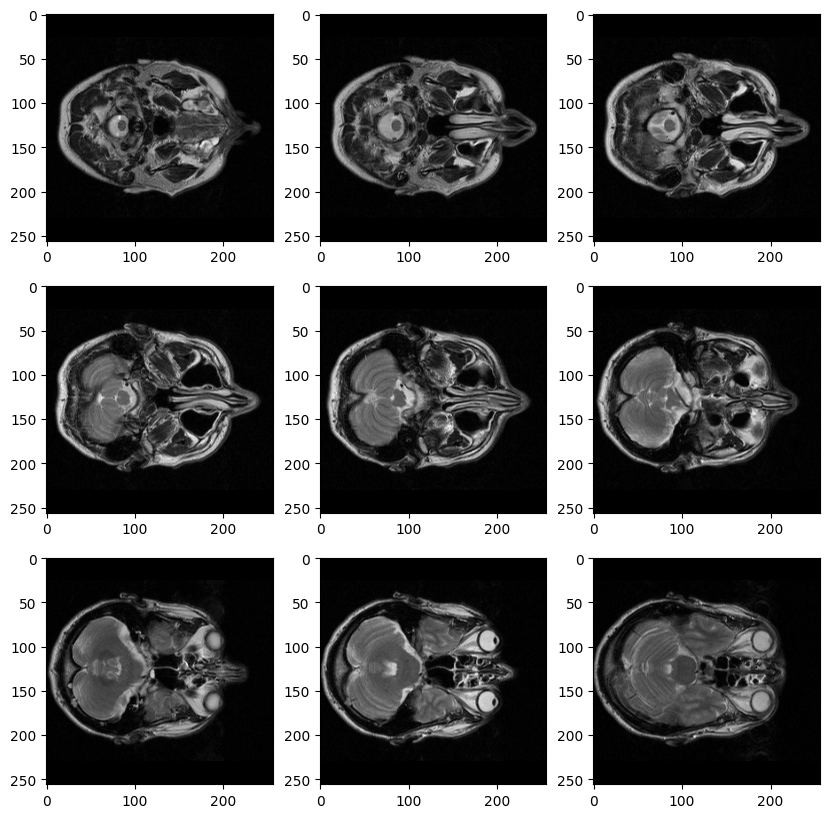

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(10,10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i,j].imshow(nifti_files.get_fdata()[:,:,slice_counter], cmap="gray")
    slice_counter += 1

In [ ]:
image_array_processed = image_array * (image_array > 300)

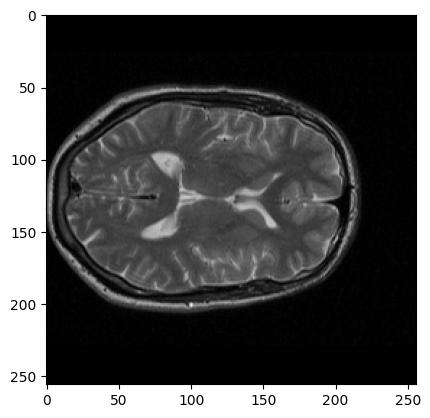

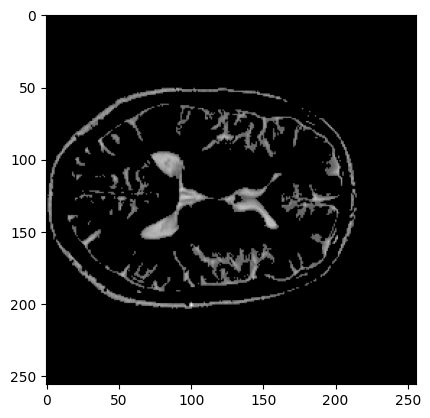

In [ ]:
plt.figure()
plt.imshow(image_array[:,:,13], cmap="gray")
plt.figure()
plt.imshow(image_array_processed[:,:,13], cmap="gray")


In [ ]:
processed_nifti_file = nib.Nifti1Image(image_array_processed, nifti_files.affine)

In [ ]:
nib.save(processed_nifti_file, "201_t2w_tse_processed.nii.gz")